In [1]:

import matplotlib.pyplot as plt # Virtulaization 
import pandas as pd # fro handle dataset 
import numpy as np # arrys 
import seaborn as sns # for draw
import sklearn  # machine learning library
from collections import Counter #count classes 

In [2]:
# we used na_vlaues Manually to recognize NaN and Infinity values in the data set 
NAD = pd.read_csv('C:\\Users\\moode\\Desktop\\MyProject\\dataset.csv',na_values=['NaN','Infinity'])
print(NAD.shape) 
mask = NAD.isnull().any(axis=1) # place of NaN and Infinty count
print(mask)
#drop data that with null values  
print("Before Drop null values", NAD.shape)
data_clean =  NAD[~mask] 
#let Benign  = 0  and Bot =1 in label  
print("Before Drop null values", data_clean.shape)
data_clean = data_clean.replace({'Label':{'Benign':0.0,'Bot':1.0}})
data_clean.head()

(1048575, 80)
0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool
Before Drop null values (1048575, 80)
(1044525, 80)
Before Drop null values (1044525, 80)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,2/3/2018 8:47,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49684,6,2/3/2018 8:47,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,443,6,2/3/2018 8:47,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,443,6,2/3/2018 8:47,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,443,6,2/3/2018 8:47,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data_clean  =data_clean.drop(['Timestamp'],axis=1)
data_clean.shape

(1044525, 79)

(1044525, 78)
(1044525,)
0.0    758334
1.0    286191
Name: Label, dtype: int64
AxesSubplot(0.22375,0.11;0.5775x0.77)


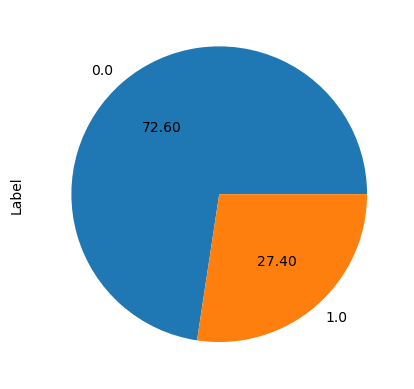

In [4]:
X = data_clean.iloc[:,:-1] # all features without (label) feature
Y = data_clean.iloc[:, -1] # only label feature 
print(X.shape)
print(Y.shape)

# Benign =0 , Bot=1 
print(Y.value_counts()) # Number of Benign and number of Bot
# graoh for label count values 
p=Y.value_counts().plot.pie(autopct='%.2f')
print(p)

In [5]:
# handling imablnced dataset using oversmapling (Somte)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 101)
X,Y = sm.fit_sample(X,Y)

AxesSubplot(0.22375,0.11;0.5775x0.77)


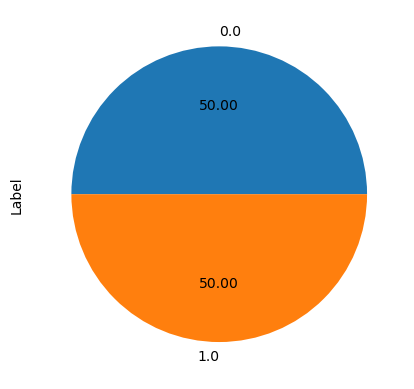

In [6]:
p=Y.value_counts().plot.pie(autopct='%.2f')
print(p)

In [7]:
X.shape

(1516668, 78)

In [8]:

Y.shape

(1516668,)

In [10]:
X = pd.DataFrame(X ,  columns=X.columns)
Y  =  pd.Series(Y)
data = pd.concat([X,Y],axis=1)
data.to_csv('oversampled2.csv',index=False)

In [11]:
data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,141385,9,7,553,3773.0,202,0,61.444444,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49684,6,281,2,1,38,0.0,38,0,19.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,443,6,279824,11,15,1086,10527.0,385,0,98.727273,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,443,6,132,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,443,6,274016,9,13,1285,6141.0,517,0,142.777778,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
